# IMPORT REQUIRED LIBRARIES

In [2066]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD THE DATA SET

In [2067]:
# Load the dataset using the full path
df = pd.read_csv(r"C:\Users\VEDHA ANAND\OneDrive\Desktop\covid-19_eda\COVID_clinical_trials.csv")

# EXPLORATORY DATA ANALYSIS

In [2068]:
# print the first few rows of the dataset
print(df.head(n = 5))

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [2069]:
# Shape of the DataSet
print(df.shape)

(5783, 27)


In [2070]:
# Check the columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [2071]:
# Check the columns
print(df.columns)

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')


In [2072]:
df.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [2073]:
# Categorical Features
df.select_dtypes(include = 'object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [2074]:
# Numerical Features
df.select_dtypes(exclude = 'object').columns

Index(['Rank', 'Enrollment'], dtype='object')

# Detecting missing data

In [2075]:
# Detecting (Percentage) Missing Data
missing_data = df.isnull().mean() * 100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [2076]:
# Check for missing values
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


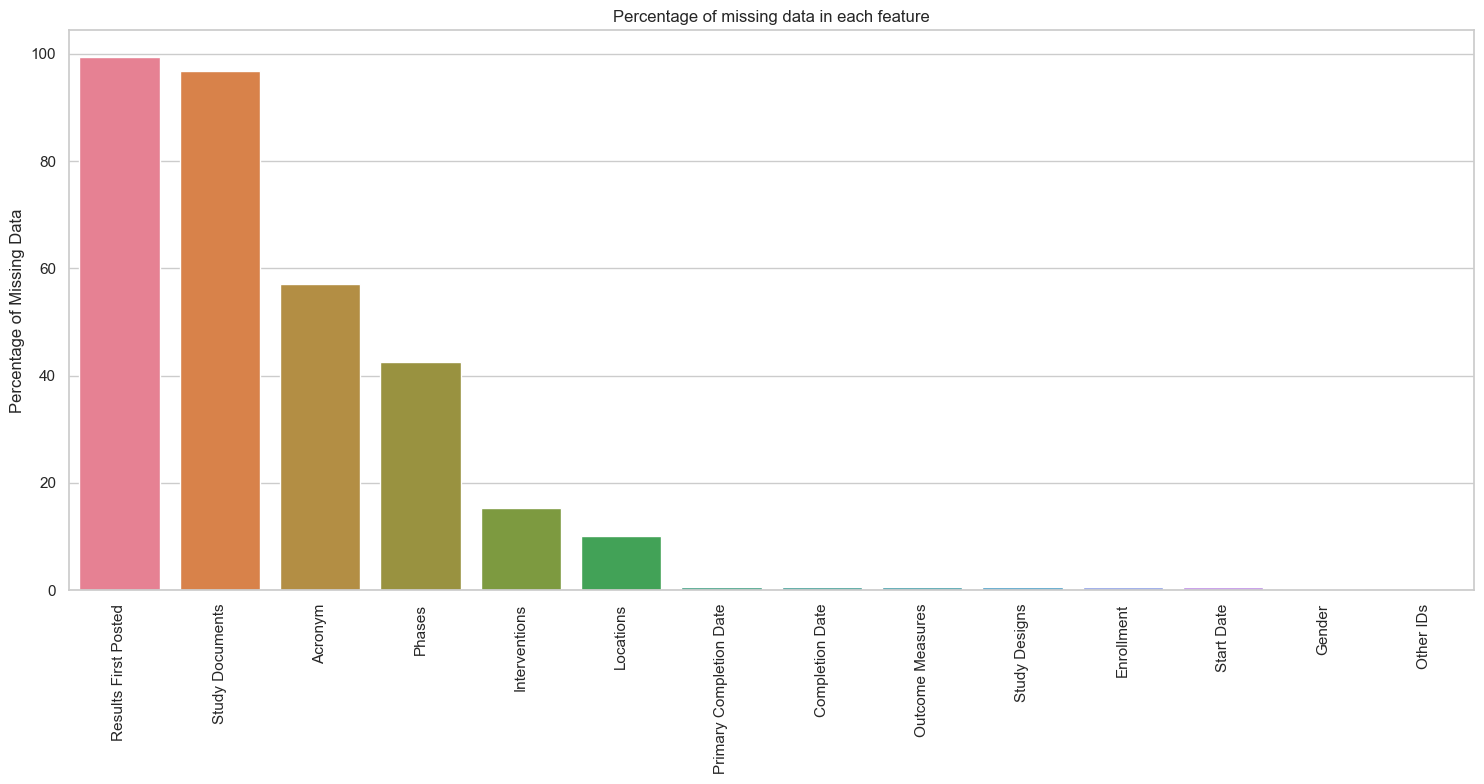

In [ ]:
missing_data = missing_data[missing_data > 0]  # Filter only columns with missing data
missing_data = missing_data.sort_values(ascending=False)  # Optional: sort by percentage

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='husl')
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Data")
plt.title("Percentage of missing data in each feature")
plt.tight_layout()
plt.show()


# Dropping columns

In [2078]:
df.drop(['Results First Posted' , 'Study Documents'] , inplace = True , axis = 1 ) # Example of dropping columns

In [2079]:
# Columns in the dataset after dropping Study Documents and Results First Posted
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [2080]:
# Drop rows that have less than 10 non-null values
print(f"Shape before dropping Null rows {df.shape}")
df.dropna(axis = 0 , thresh = 10 , inplace = True)
print(f"Shape after dropping Null rows {df.shape}")

Shape before dropping Null rows (5783, 25)
Shape after dropping Null rows (5783, 25)


In [2081]:
# Drop Duplicate Rows
print(f"Shape before dropping duplicates data {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Shape after dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 25)
Shape after dropping duplicates data (5783, 25)


# Imputation of missing values

In [2082]:
# We can extract a new feature form The Location which is the country where the study hold
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [2083]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [2084]:
df.Country.value_counts()[:35]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South

In [2085]:
# Check for missing values
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Last Update Posted            0
Locations                   585
URL                           0
Country                       0
dtype: int64


Now We need to clasify the missing data to one of these categories
1) Missing Completely At Random (MCAR)
2) Missing At Random (MAR)
3) Not Missing At Random (NMAR)

In [2086]:
# Let's start with acronym
print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [2087]:
# Find the realtion between null values in Acronym and Countries
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)[:60]

Country
 Iraq                      100.000000
 Belarus                   100.000000
 Rwanda                    100.000000
 South Sudan               100.000000
 Cambodia                  100.000000
 Bulgaria                  100.000000
 Cyprus                    100.000000
 Bosnia and Herzegovina    100.000000
 Guinea-Bissau             100.000000
 Dominican Republic        100.000000
 Ecuador                   100.000000
 North Macedonia           100.000000
 Bahrain                   100.000000
 Azerbaijan                100.000000
 Uruguay                   100.000000
 Uzbekistan                100.000000
 Kyrgyzstan                100.000000
 Cape Verde                100.000000
 Republic of                96.774194
 Taiwan                     93.750000
 Singapore                  93.103448
 Japan                      88.888889
 Kuwait                     87.500000
 China                      87.134503
 Turkey                     86.757991
 Ukraine                    85.714286
 Mal

● After inspecting the relation between the missing values in Acronym and
Country we can conclude that there is a sort of relation between these two
features, so we can say that Data is Missing At Random (MAR).
● So we can Impute by Missing Category.

In [2088]:
# impute by a missing Indicator
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [2089]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

In [2090]:
# Impute Interventions , Phases , Locations by Missing Category
categorical_features = df.select_dtypes(include = object).columns
features = categorical_features[df[categorical_features].isnull().mean() > 0]
for feature in features:
    df[feature] = df[feature].fillna(f"Missing {feature}")


In [2091]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

Rank                       0.00000
NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Study Results              0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Other IDs                  0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
First Posted               0.00000
Last Update Posted         0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

In [2092]:
# Check the skewness
df.Enrollment.skew()

34.06593382031148

The value of Skewness is 34 which means that this feature is not normally distributed.

<Axes: ylabel='Density'>

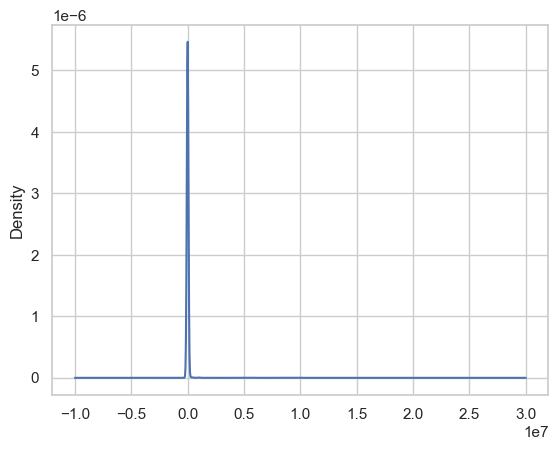

In [2093]:
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind = 'kde')

So we will impute by median.

In [2094]:
# Some Statstical Valuse for the Enrollment Column
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"The min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

The min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [2095]:
# Using Median to impute Missing Values
df.Enrollment = df.Enrollment.fillna(median_Value)

In [2096]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100


Rank                       0.0
NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last Update Posted         0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

# UNIVARIATE ANALYSIS

Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

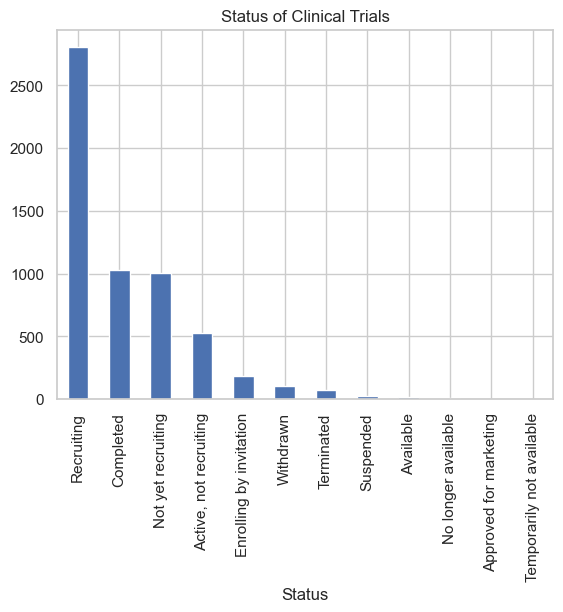

In [2097]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')   # Status distribution

Phases
Missing Phases     2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

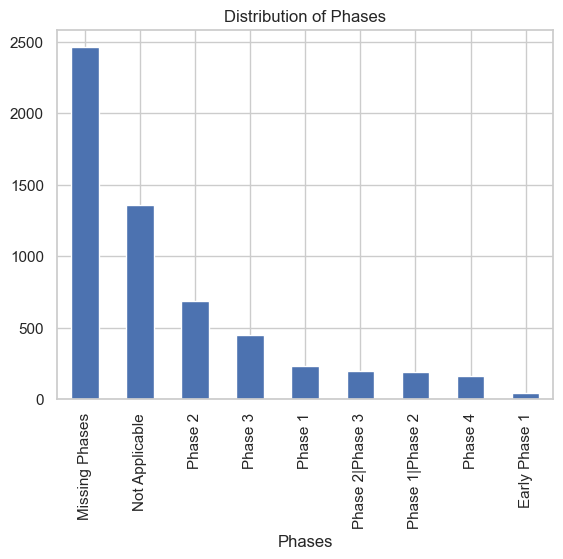

In [2098]:
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar', title='Distribution of Phases')   # Phase distribution

Age
18 Years and older   (Adult, Older Adult)           2885
Child, Adult, Older Adult                            486
18 Years to 80 Years   (Adult, Older Adult)          221
18 Years to 65 Years   (Adult, Older Adult)          155
18 Years to 75 Years   (Adult, Older Adult)          135
                                                    ... 
15 Years to 45 Years   (Child, Adult)                  1
1 Month to 30 Years   (Child, Adult)                   1
21 Years to 40 Years   (Adult)                         1
11 Years and older   (Child, Adult, Older Adult)       1
8 Years to 20 Years   (Child, Adult)                   1
Name: count, Length: 417, dtype: int64


<Axes: title={'center': 'Age Group Distribution'}, xlabel='Age'>

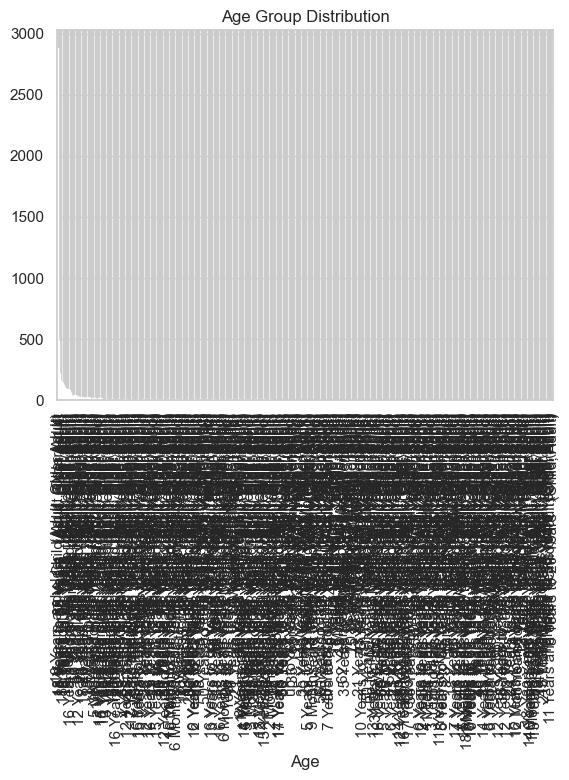

In [2099]:
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='bar', title='Age Group Distribution')   # Age group analysis

# BIVARIATE ANALYSIS

Phases                     Early Phase 1  Missing Phases  Not Applicable  \
Status                                                                     
Active, not recruiting                 7             175             111   
Approved for marketing                 0               2               0   
Available                              0              19               0   
Completed                              3             565             226   
Enrolling by invitation                4              96              54   
No longer available                    0              12               0   
Not yet recruiting                     5             350             282   
Recruiting                            22            1224             647   
Suspended                              2               2               2   
Temporarily not available              0               1               0   
Terminated                             0               4              13   
Withdrawn   

<Axes: title={'center': 'Status vs. Phases'}, xlabel='Status'>

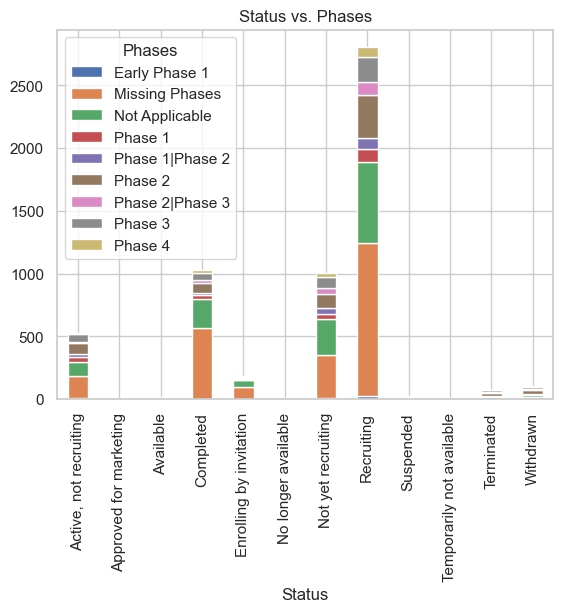

In [2100]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

In [2101]:
conditions_outcomes = (
    df.groupby('Conditions')['Outcome Measures']
      .apply(lambda x: ', '.join(x.dropna().astype(str)))
      .reset_index()
)
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

# TIME SERIES ANALYSIS

In [2102]:
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

In [2103]:
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

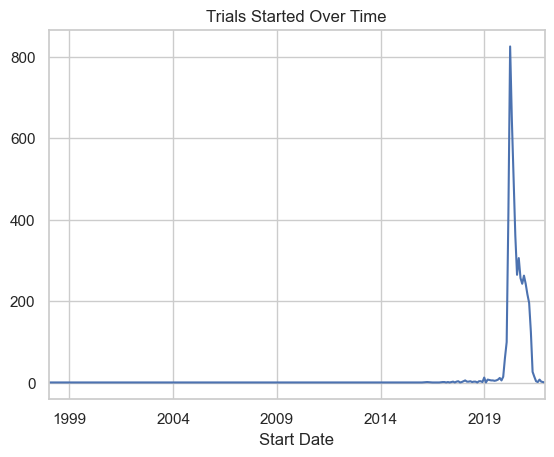

In [2104]:
# Plot the number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind= 'line', title='Trials Started Over Time')

In [2105]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,2020-11-09,2020-12-22,"April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,2020-11-02,2020-12-15,"January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,2020-05-07,2021-06-15,"June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,2020-05-25,2020-07-31,"August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,2020-05-05,NaT,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


# Data Visualizations

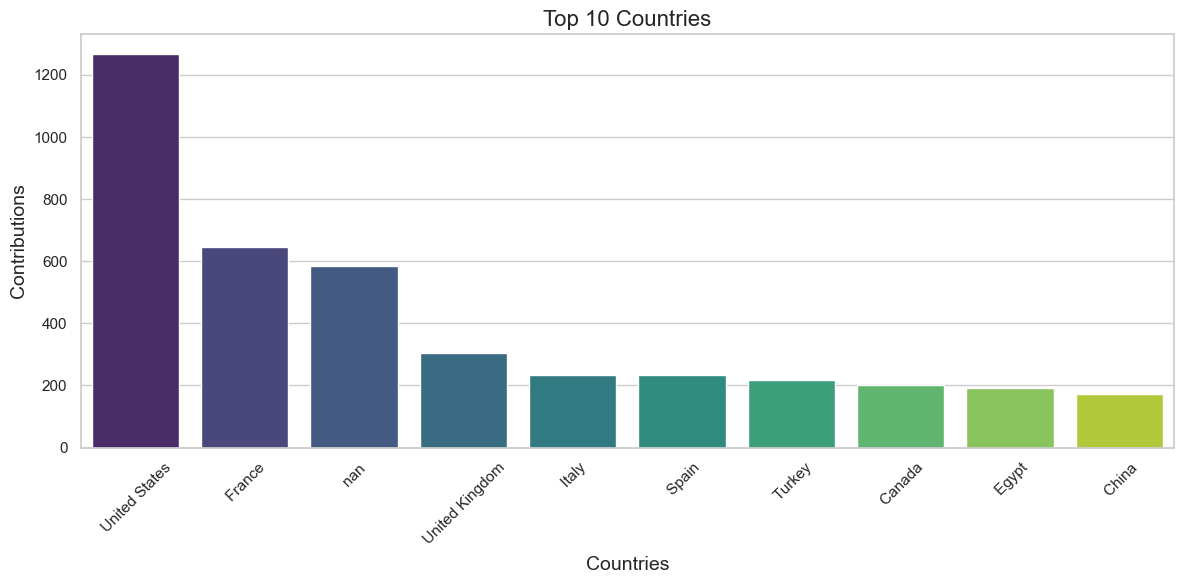

In [2106]:
# Get countries with highest contributions
top_10_countries = df['Country'].value_counts().head(10)


def visualize_data(data, caption='', ylabel=''):
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')

    # Bar plot
    ax = sns.barplot(x=data.index, y=data.values, palette='viridis')

    # Labels and title
    plt.title(caption, fontsize=16)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('Countries', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


# Visualize the data
visualize_data(top_10_countries, caption='Top 10 Countries', ylabel='Contributions')

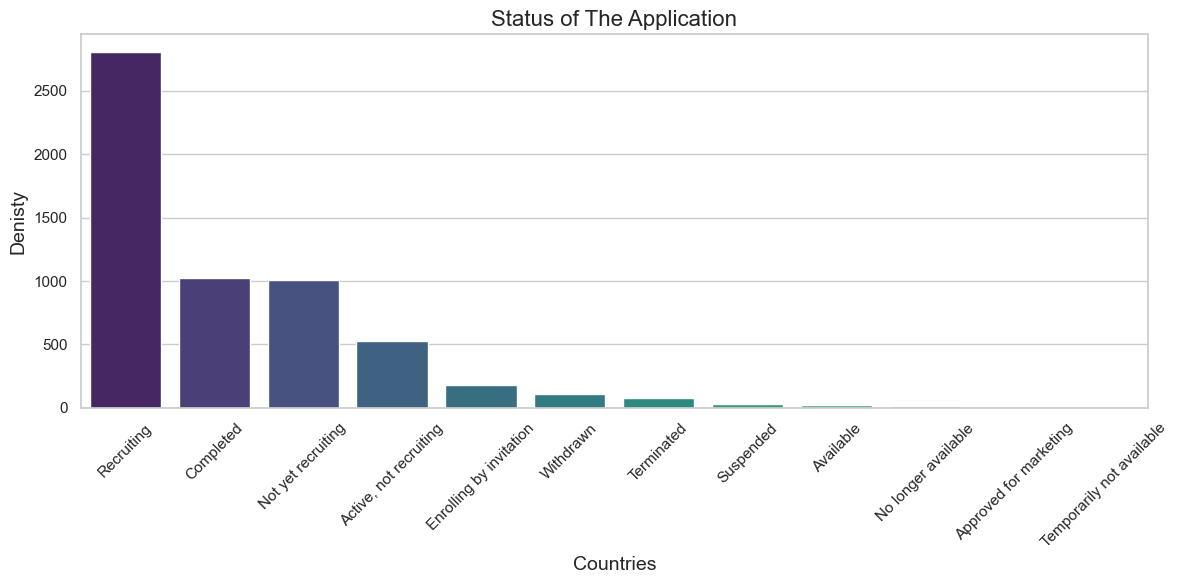

In [2107]:
# Status of the Application
status = df.Status.value_counts()
visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')

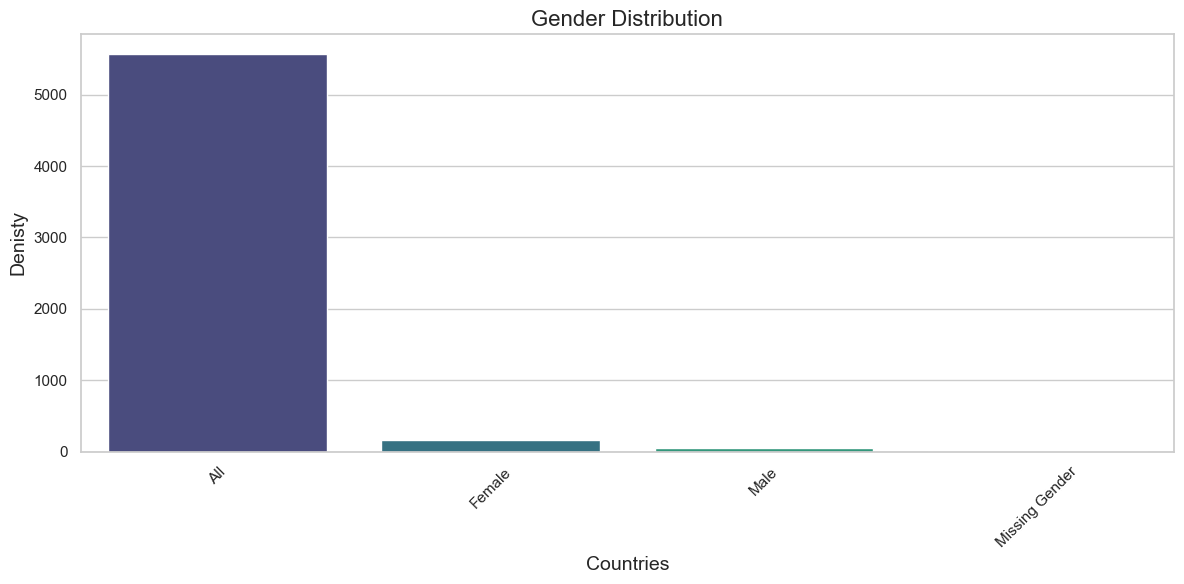

In [2108]:
# Gender Visualiztions
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution' , ylabel = 'Denisty')


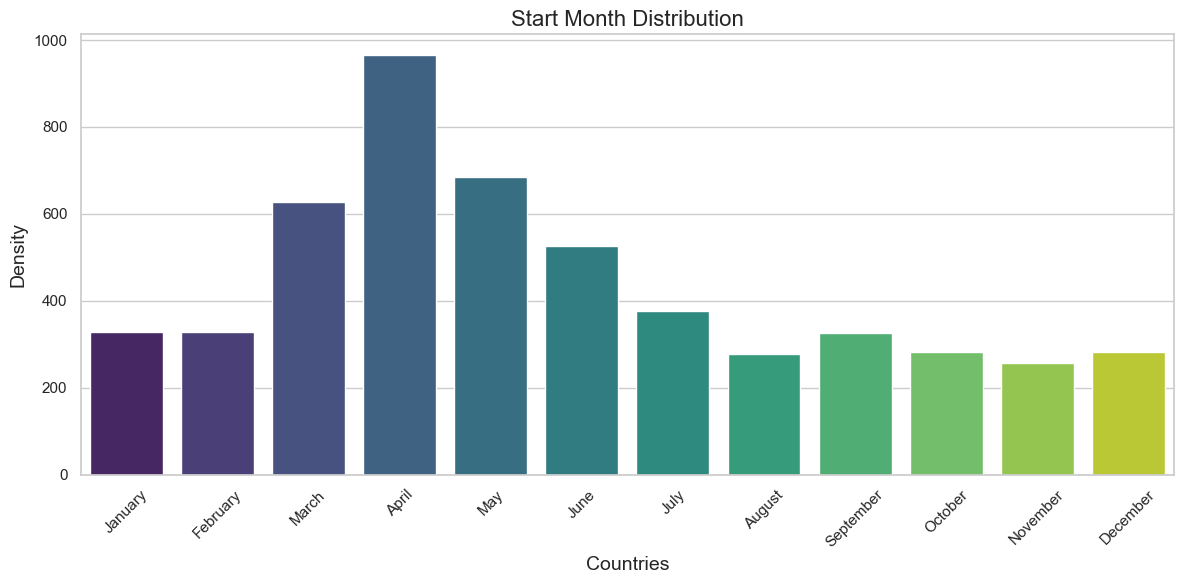

In [2109]:
# Convert 'Start Date' to datetime if it's not already
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Extract the month name from 'Start Date'
start_month = df['Start Date'].dt.month_name()

# Count frequency of each month
start_month_distribution = start_month.value_counts().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Visualize
visualize_data(start_month_distribution, caption='Start Month Distribution', ylabel='Density')

In [2110]:
print(f"The shape of data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of data frame is (5783, 26)
Nunique in NCT Number is 5783
Nunique in URL is 5783


# Saving the cleaned data

In [2111]:
# Save the cleaned data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)